### Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

calendar = pd.read_csv('./Airbnb Seattle Listings/calendar.csv',dtype={'zipcode':object})
listings = pd.read_csv('./Airbnb Seattle Listings/listings.csv',dtype={'zipcode':object})
reviews = pd.read_csv('./Airbnb Seattle Listings/reviews.csv',dtype={'zipcode':object})
prop_assessments = pd.read_csv('./Airbnb Seattle Listings/house_price.csv', dtype={'zipcode':object})
house_rents = pd.read_csv('./Airbnb Seattle Listings/rent.csv', encoding='latin-1', dtype={'id':object,'State_Code':object,'State_Name':object,'State_ab':object,'County':object,'City':object,'Place':object,'Type':object,'Primary':object,'Zip_Code':object,'Area_Code':object,'ALand':object,'AWater':object,'Lat':object, 'Lon':object, 'Mean':int, 'Median':int, 'Stdev':int,'Samples':int})

### Homogenize attributes

In [2]:
# Price string to float
listings.monthly_price = listings.monthly_price.replace('[\$,]', '', regex=True).astype(float)
listings.weekly_price = listings.weekly_price.replace('[\$,]', '', regex=True).astype(float)
listings.price = listings.price.replace('[\$,]', '', regex=True).astype(float)
# remove entries with corrupt zipcode
listings = listings[listings.zipcode != "99\n98122"]
# rename attribute to match other dataframes
listings = listings.rename(columns={'id': 'listing_id'})
house_rents = house_rents.rename(columns={'Zip_Code': 'zipcode'})

# index dataframes by listing_id
calendar = calendar.set_index('listing_id')
listings = listings.set_index('listing_id')
reviews = reviews.set_index('listing_id')

### Preview Data

In [3]:
listings.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
listing_id,,,,,,,,,,,,,,,,,,,,,
241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
house_rents.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,zipcode,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,Samples
0,0101901,01,Alabama,AL,Chambers County,Wadley,Abanda,CDP,place,36276,256,7764034,34284,33.091627,-85.527029,972,968,51,12
1,0101904,01,Alabama,AL,Winston County,Addison,Addison,Town,place,35540,256,9753292,83417,34.202681,-87.178004,519,460,275,64
2,0101907,01,Alabama,AL,Marshall County,Albertville,Albertville city,City,place,35950,256,68731806,258708,34.26313,-86.21066,625,585,234,2560
3,0101910,01,Alabama,AL,Pickens County,Aliceville,Aliceville city,City,place,35442,205,11819855,0,33.123686,-88.159364,546,438,354,574
4,0101913,01,Alabama,AL,Etowah County,Walnut Grove,Altoona,Town,place,35990,205,11193369,25442,34.039204,-86.305697,350,303,185,114


In [5]:
prop_assessments.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Create dataframe with useful data

In [11]:
total_sq_ft = len(listings.square_feet)
nan_sq_ft = total_sq_ft - listings.square_feet.count()
print('\nsquare_feet attribute is vastly Nan, not very useful')
print('Total square_feet entries: {}, Total square_feet NaN: {}'.format(total_sq_ft, nan_sq_ft))



data = listings[['price', 'review_scores_location', 'monthly_price', 'weekly_price', 'square_feet', 'property_type', 'bedrooms','bathrooms','accommodates', 'zipcode', 'host_neighbourhood']]
print('\nSanitized Data:')
data.head()


square_feet attribute is vastly Nan, not very useful
Total square_feet entries: 3817, Total square_feet NaN: 3720

Sanitized Data:


,price,review_scores_location,monthly_price,weekly_price,square_feet,property_type,bedrooms,bathrooms,accommodates,zipcode,host_neighbourhood
listing_id,,,,,,,,,,,
241032,85.0,9.0,NaN,NaN,NaN,Apartment,1.0,1.0,4,98119,Queen Anne
953595,150.0,10.0,3000.0,1000.0,NaN,Apartment,1.0,1.0,4,98119,Queen Anne
3308979,975.0,10.0,NaN,NaN,NaN,House,5.0,4.5,11,98119,Queen Anne
7421966,100.0,NaN,2300.0,650.0,NaN,Apartment,0.0,1.0,3,98119,Queen Anne
278830,450.0,9.0,NaN,NaN,NaN,House,3.0,2.0,6,98119,Queen Anne


### Group by neighbourhood

In [7]:
by_neighbourhood = data.groupby(['host_neighbourhood'])

hoods = data.host_neighbourhood.dropna().unique()

h_prices = by_neighbourhood.price.mean()
h_loc_reviews = by_neighbourhood.review_scores_location.mean()

h_prices.head()


host_neighbourhood
Alki             182.090909
Anaheim          173.285714
Arbor Heights    118.000000
Atlantic         112.714286
Baldwin Hills     75.000000
Name: price, dtype: float64

### Grouping by Zipcode

In [8]:
by_zip = data.groupby(['zipcode'])
zips = data.zipcode.dropna().unique()
z_prices = by_zip.price.mean()
z_loc_reviews = by_zip.review_scores_location.mean()

z_prices.head()

zipcode
98101    166.721393
98102    127.103245
98103    124.149746
98104    135.221053
98105    107.111111
Name: price, dtype: float64

### Plot Both Groupings

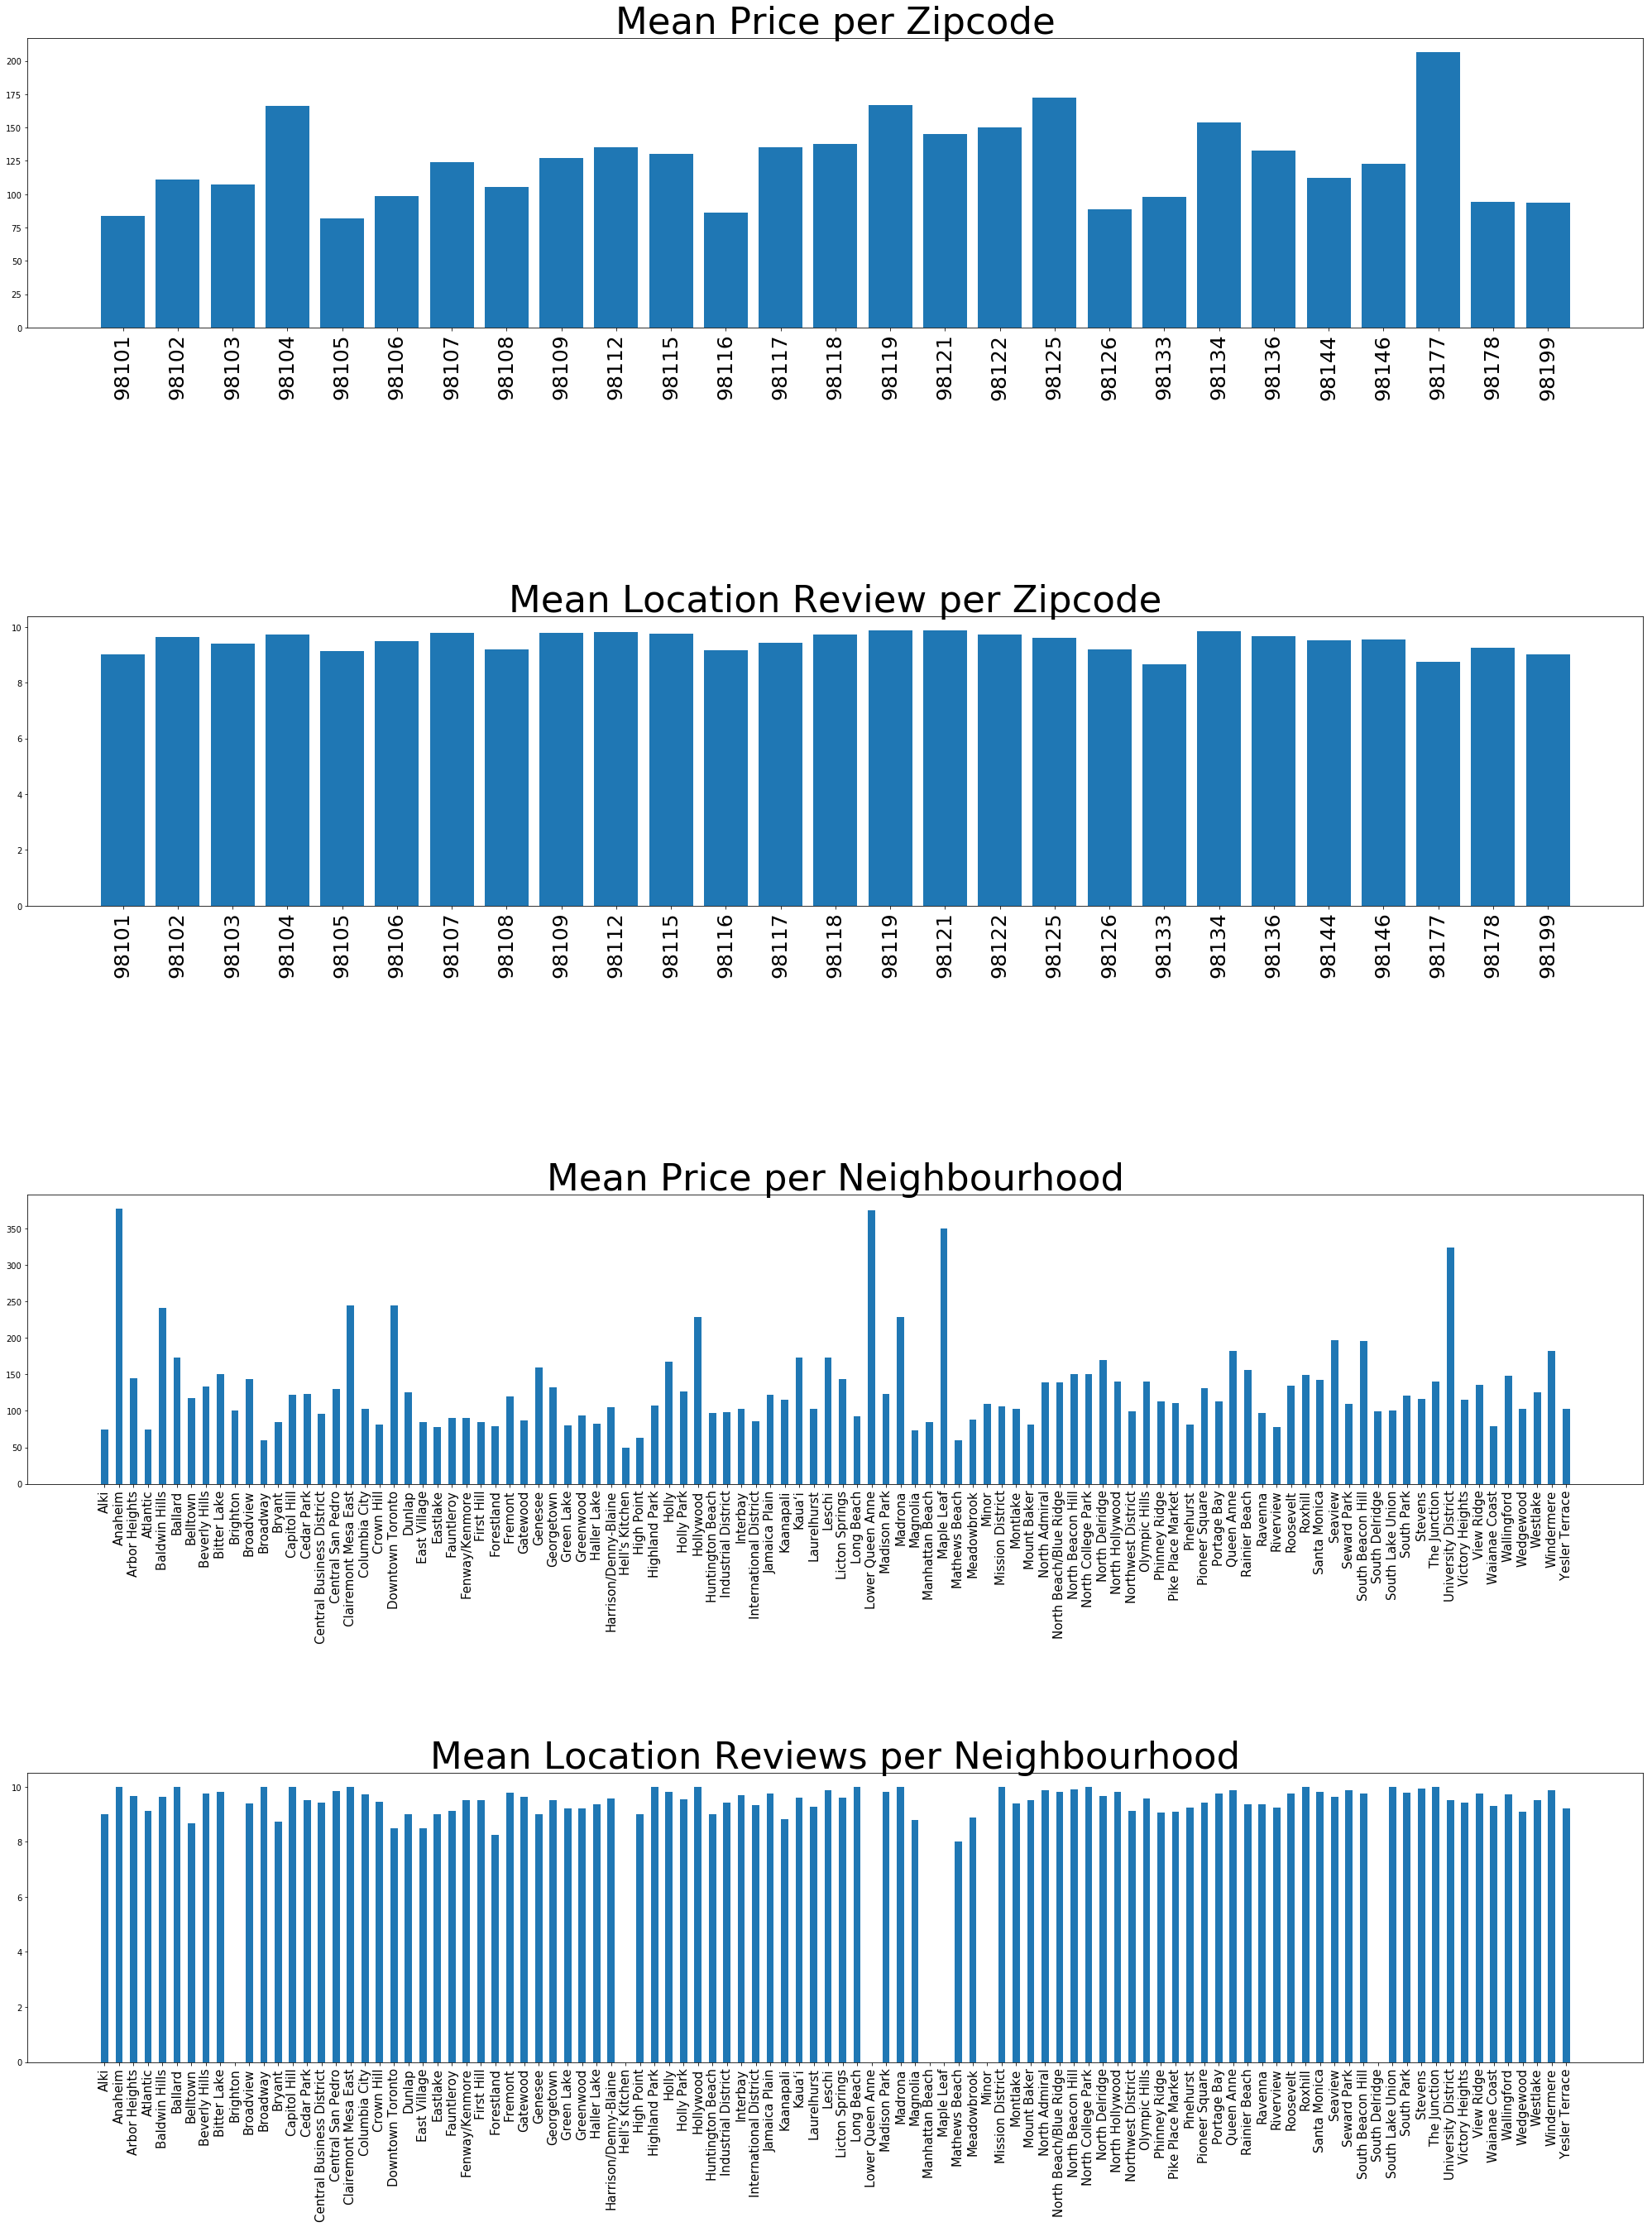

In [9]:
fig, xarr = plt.subplots(4,1, figsize=(35,45))
fig.subplots_adjust(hspace=1)
  
xarr[0].bar(zips, z_prices)
xarr[0].set_title('Mean Price per Zipcode')

xarr[1].bar(zips, z_loc_reviews)
xarr[1].set_title('Mean Location Review per Zipcode')

xarr[2].bar(hoods, h_prices, width=0.5)
xarr[2].set_title('Mean Price per Neighbourhood');

xarr[3].bar(hoods, h_loc_reviews, width=0.5)
xarr[3].set_title('Mean Location Reviews per Neighbourhood');

for i in range(4):
    plt.sca(xarr[i])
    xarr[i].title.set_size(45)
    fontsize = 25 if i < 2 else 15
    plt.xticks(rotation='vertical', fontsize=fontsize)


### Mean price per neighbourhood per amount of rooms

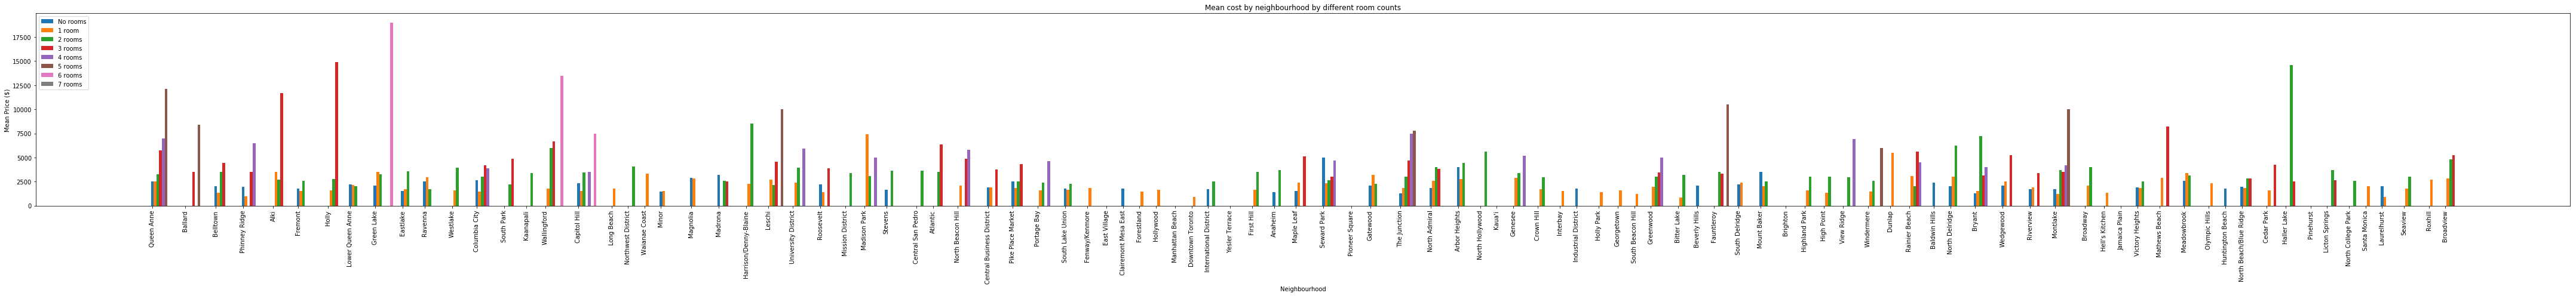

In [10]:
import random
import math

plt.close()
frig, ax = plt.subplots(figsize=(60,7))
frig.subplots_adjust(hspace=10)
width = 0.4
padding = 5

by_hood = data.groupby('host_neighbourhood')
#hoods = data.host_neighbourhood.dropna().unique()

fewhosts = data.host_neighbourhood.dropna().unique()[:]
subdata = data[data['host_neighbourhood'].isin(fewhosts)]

roomconfigs = {}
for i in subdata.host_neighbourhood.dropna().unique():
    roomconfigs[i] = len(subdata[subdata['host_neighbourhood'] == i].bedrooms.dropna().unique())
    
#print(roomconfigs)
    
starts = {}
pads = {}
cur = 0
p = 0
for i in subdata.host_neighbourhood.dropna().unique():
    starts[i] = cur * width
    pads[i] = p
    p = p + padding * width
    cur = cur + roomconfigs[i]
    
rooms = subdata.sort_values('bedrooms').bedrooms.dropna().unique()
r = 0
for i in rooms:
    by_hood = subdata[subdata['bedrooms'] == i].groupby('host_neighbourhood')
    hoods = subdata[subdata['bedrooms'] == i].host_neighbourhood.dropna().unique()
    prices = by_hood.monthly_price.mean()
    pos = [r*width + starts[x] + pads[x] for x in hoods]
    r = r + 1
        
    plt.bar(pos, prices, width)

ax.set_xticks([starts[x] + pads[x] for x in subdata.host_neighbourhood.dropna().unique()])
ax.set_xticklabels(subdata.host_neighbourhood.dropna().unique())
plt.xticks(rotation='vertical')
plt.legend(["No rooms", "1 room"] + [str(x) + " rooms" for x in range(2,len(rooms))], loc='upper left')
plt.title("Mean cost by neighbourhood by different room counts")
plt.xlabel("Neighbourhood")
plt.ylabel("Mean Price ($)")
plt.tight_layout()